In [1]:
!pip install yfinance pandas numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable


[*********************100%***********************]  1 of 1 completed


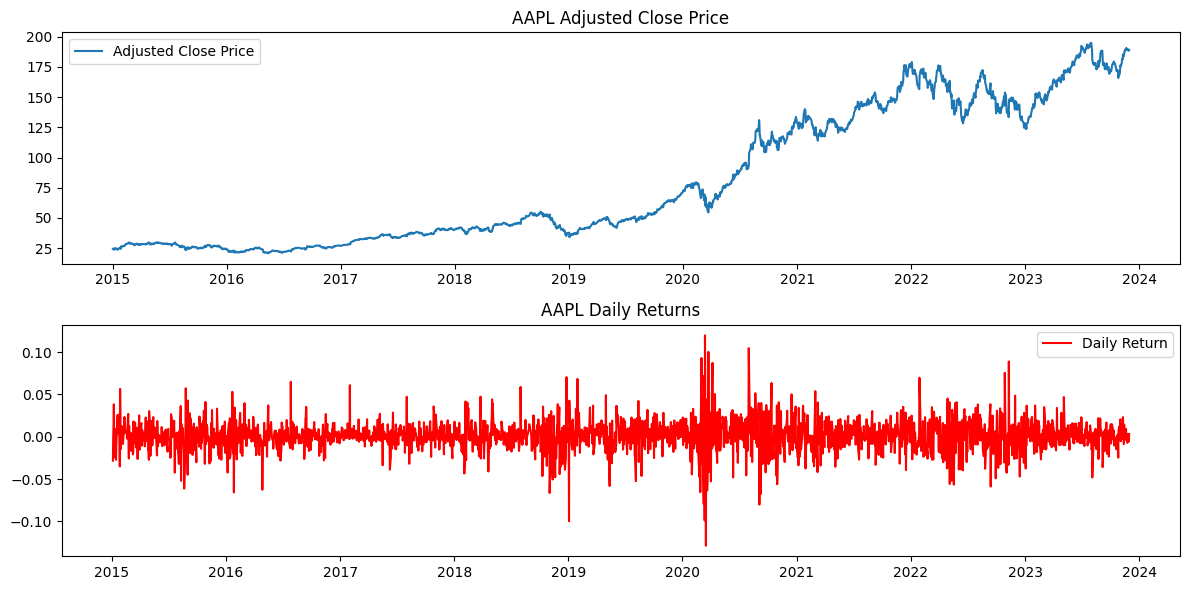

Volatility: 0.2914
Value-at-Risk (VaR) at 95% confidence: -2.78%
Sharpe Ratio: 0.9363


,Stock Symbol,Volatility,Value-at-Risk (VaR),Sharpe Ratio
0,AAPL,0.291375,-2.779073,0.936301


In [2]:
# Importing required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical stock data from Yahoo Finance
stock_symbol = 'AAPL'  # Example: Apple stock
start_date = '2015-01-01'
end_date = '2023-12-01'

# Fetch stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of data
data.head()

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Plotting the stock's adjusted closing price and daily returns
plt.figure(figsize=(12, 6))

# Plot Adjusted Close Price
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.title(f'{stock_symbol} Adjusted Close Price')
plt.legend()

# Plot Daily Returns
plt.subplot(2, 1, 2)
plt.plot(data['Daily Return'], label='Daily Return', color='red')
plt.title(f'{stock_symbol} Daily Returns')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate financial risk metrics

# Volatility (annualized standard deviation of returns)
volatility = data['Daily Return'].std() * np.sqrt(252)

# Value-at-Risk (VaR) at 95% confidence level (1-day VaR)
VaR = data['Daily Return'].quantile(0.05) * 100  # 1-day VaR in percentage terms

# Sharpe ratio (assuming a risk-free rate of 0%)
sharpe_ratio = data['Daily Return'].mean() / data['Daily Return'].std() * np.sqrt(252)

# Display the calculated risk metrics
print(f"Volatility: {volatility:.4f}")
print(f"Value-at-Risk (VaR) at 95% confidence: {VaR:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Prepare a summary DataFrame for the results
risk_data = {
    'Stock Symbol': [stock_symbol],
    'Volatility': [volatility],
    'Value-at-Risk (VaR)': [VaR],
    'Sharpe Ratio': [sharpe_ratio]
}

# Convert the risk data to a DataFrame
risk_df = pd.DataFrame(risk_data)

# Save the risk data to a CSV for use in Power BI
risk_df.to_csv(f'{stock_symbol}_financial_risk_analysis.csv', index=False)

# Display the risk summary DataFrame
risk_df
